The code in `pyldl.applications.lesion_counting` is basically an unofficial implementation of the paper "Joint Acne Image Grading and Counting via Label Distribution Learning" (*ICCV* 2019).

In [1]:
import numpy as np
import pandas as pd

In [2]:
import pyldl.applications.lesion_counting as lc

In [3]:
from pyldl.metrics import euclidean
from pyldl.utils import LDLEarlyStopping

In [4]:
import keras

In [5]:
X, _, counts = lc.load_acne04('./ACNE04')

In [6]:
y = lc.preprocessing(counts, sigma=3.)

In [7]:
val = int(X.shape[0] * 0.9)

In [8]:
model = lc.LDL_ACNE()

In [9]:
model.fit(X[:val], y[:val], verbose=1, batch_size=32, optimizer=keras.optimizers.SGD(2e-5),
          X_val=X[val:], y_val=y[val:], callbacks=[LDLEarlyStopping(monitor='mean_absolute_error', patience=200)]);

 511/1000 ━━━━━━━━━━━━━━━━━━━━ 2110s 4s/step - loss: 997.4271 - mean_absolute_error: 28.0719 
Epoch 511: early stopping (best mean_absolute_error: 22.6432732476207).


In [10]:
X_test, grades_test, counts_test = lc.load_acne04('./ACNE04', mode='test')

In [11]:
counts_test = lc.preprocessing(counts_test)

In [12]:
counts_pred, grades_pred = model.predict(X_test, batch_size=32, return_grades=True)

In [13]:
df = pd.DataFrame({'score': euclidean(counts_test, counts_pred, reduction=None),
                   'group': grades_test})
samples = df.groupby('group')['score'].idxmin().values

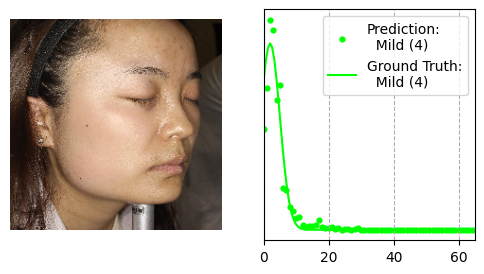

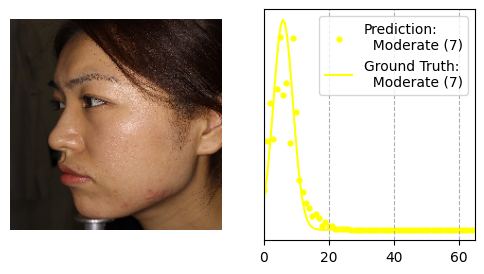

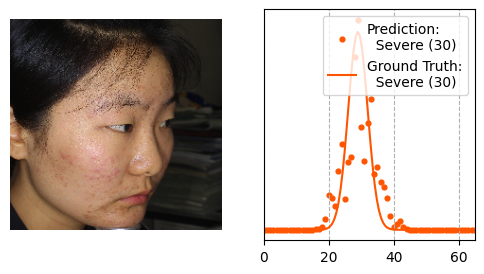

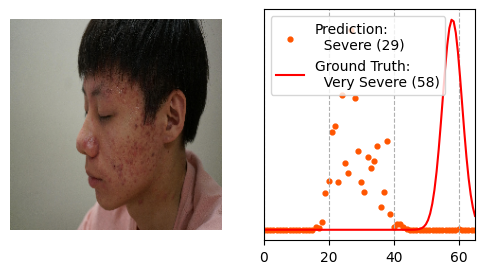

In [14]:
for i in samples:
    lc.visualization(X_test[i], grades_pred[i], counts_pred[i],
                     grade_real=grades_test[i], count_real=counts_test[i])